In [2]:
pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import tensorflow_hub as hub
import tensorflow_text as text

In [4]:
df_x_train = pd.read_csv("X_train.csv")
print(df_x_train)
df_y_train = pd.read_csv("y_train.csv")
print(df_y_train)

        id              keyword            location  \
0     2714              crushed         Chicago, IL   
1     7361           obliterate         Cymru araul   
2     1290               bloody             Chicago   
3     1932  burning%20buildings                 NaN   
4     4041             disaster         Calgary, AB   
...    ...                  ...                 ...   
6085  7532          oil%20spill    Street of Dallas   
6086  1821               burned  toronto Û¢ dallas   
6087  9504            terrorist                 NaN   
6088  2797               curfew            IM LOST    
6089  3667              destroy                 NaN   

                                           cleaned_text  
0       jimmyfallon crush squirrel bone mortar pestl...  
1      mccainenl think spectacular look stonewal rio...  
2     can t bloodi wait   soni set date stephen king...  
3     protest ralli stone mountain  atleast they r b...  
4      rbcinsur quot websit   disaster  tri 3 bro

In [5]:
df_x_val = pd.read_csv("X_val.csv")
print(df_x_val)
df = df_x_train.drop(["id", "keyword", "location"], axis = 1)

        id         keyword                       location  \
0     6959        massacre                       Colorado   
1     6453         injured                      Worldwide   
2     5764  forest%20fires                            NaN   
3     3841        detonate                  Morioh, Japan   
4     2341        collapse                         Europe   
...    ...             ...                            ...   
1518  7581        outbreak                    FCT, Abuja    
1519  4790       evacuated                     Manchester   
1520  1382      body%20bag  sitting on Eddie Vedders lap,   
1521  4068       displaced       Pedophile hunting ground   
1522  1105       blew%20up                            NaN   

                                           cleaned_text  
0     colorado movi massacr trial juror reach verdic...  
1     top stori   googl 4 dead dozen injur gaza blas...  
2     group florida forest servic firefight could de...  
3       tinyjecht anoth stand user 

In [6]:
x_column = df["cleaned_text"]
y_column = df_y_train["target"]
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [7]:
import tensorflow as tf
def get_sentence_embedding(sentences):
  preprocessed_text = bert_text(sentences)
  return bert_encoder(preprocessed_text)["pooled_output"]

In [8]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['pooled_output'])
l = tf.keras.layers.Dense(100,  activation='relu', name='output1')(l)
l = tf.keras.layers.Dropout(0.2, name="dropout2")(l)
l = tf.keras.layers.Dense(50, activation='relu', name='output2')(l)
l = tf.keras.layers.Dropout(0.2, name="dropout3")(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [10]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_column, y_column, epochs=2)

Epoch 1/2
191/191 [==============================] - 2884s 15s/step - loss: 0.6565 - accuracy: 0.6107
Epoch 2/2
191/191 [==============================] - 2853s 15s/step - loss: 0.5930 - accuracy: 0.6975


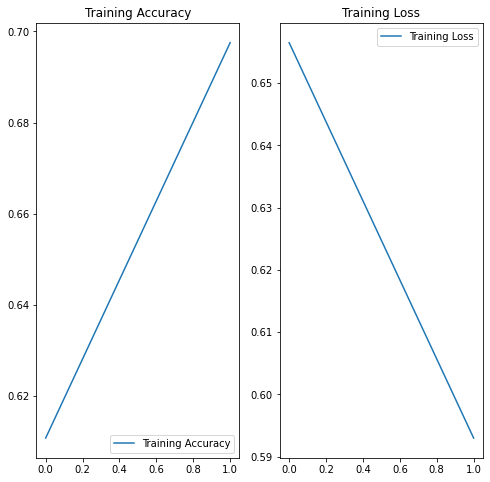

In [12]:
acc = history.history['accuracy']

loss = history.history['loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(2), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(2), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()